# C++ Assessment

## Part 1

First we include the header files that we need:

In [1]:
// Including necessary headers 
#include <iostream>

The code provided:

In [2]:
struct Point
{
    double x;
    double y;
    Point(double _x = 0.0, double _y = 0.0)
    {
        x = _x;
        y = _y;   
    }
    Point operator-(Point p)
    {
       return Point(x - p.x,y - p.y);
    }
};

struct Line_Segment
{
    Point a;
    Point b;
    Line_Segment(Point _a, Point _b)
    {
        a = _a;
        b = _b;
    }
    double anon(Line_Segment other)
    {
        Point c = b - a;
        Point d = other.b - other.a;
        return c.x * d.y - d.x*c.y;
    }
};

Given two line segments AB and CD, the 'anon' function transforms each of the two segments into a vector, and then finds the the cross product of the vectors. Geometrically, the magnitude of this result is equivalent to the area of the parallelogram formed by the two vectors (or the area of the parallelogram formed by the two line segments if they are translated, such that points A and C lie at the origin), and the sign of this result is based on the relative direction of the vectors.

For example, we consider the line segments A=(2,3) to B=(3,0) and C=(-1,1) to D=(5,3). Then using the 'anom' function we have:

In [3]:
Point A (2,3);
Point B (3,0);
Point C (-1,1);
Point D (5,3);

In [4]:
Line_Segment AB (A,B);
Line_Segment CD (C,D);

In [5]:
std::cout << AB.anon(CD) << std::endl;

20


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f8201ffd540


The result of 20 matches our geometrical interpretation below -  the first diagram shows the two line segments, the second diagram shows the equivalent vectors, and the third diagram shows the resulting parallelogram with an area of 20 (in this case a rectangle with sides of length $\sqrt{10}$ and $\sqrt{40}$).

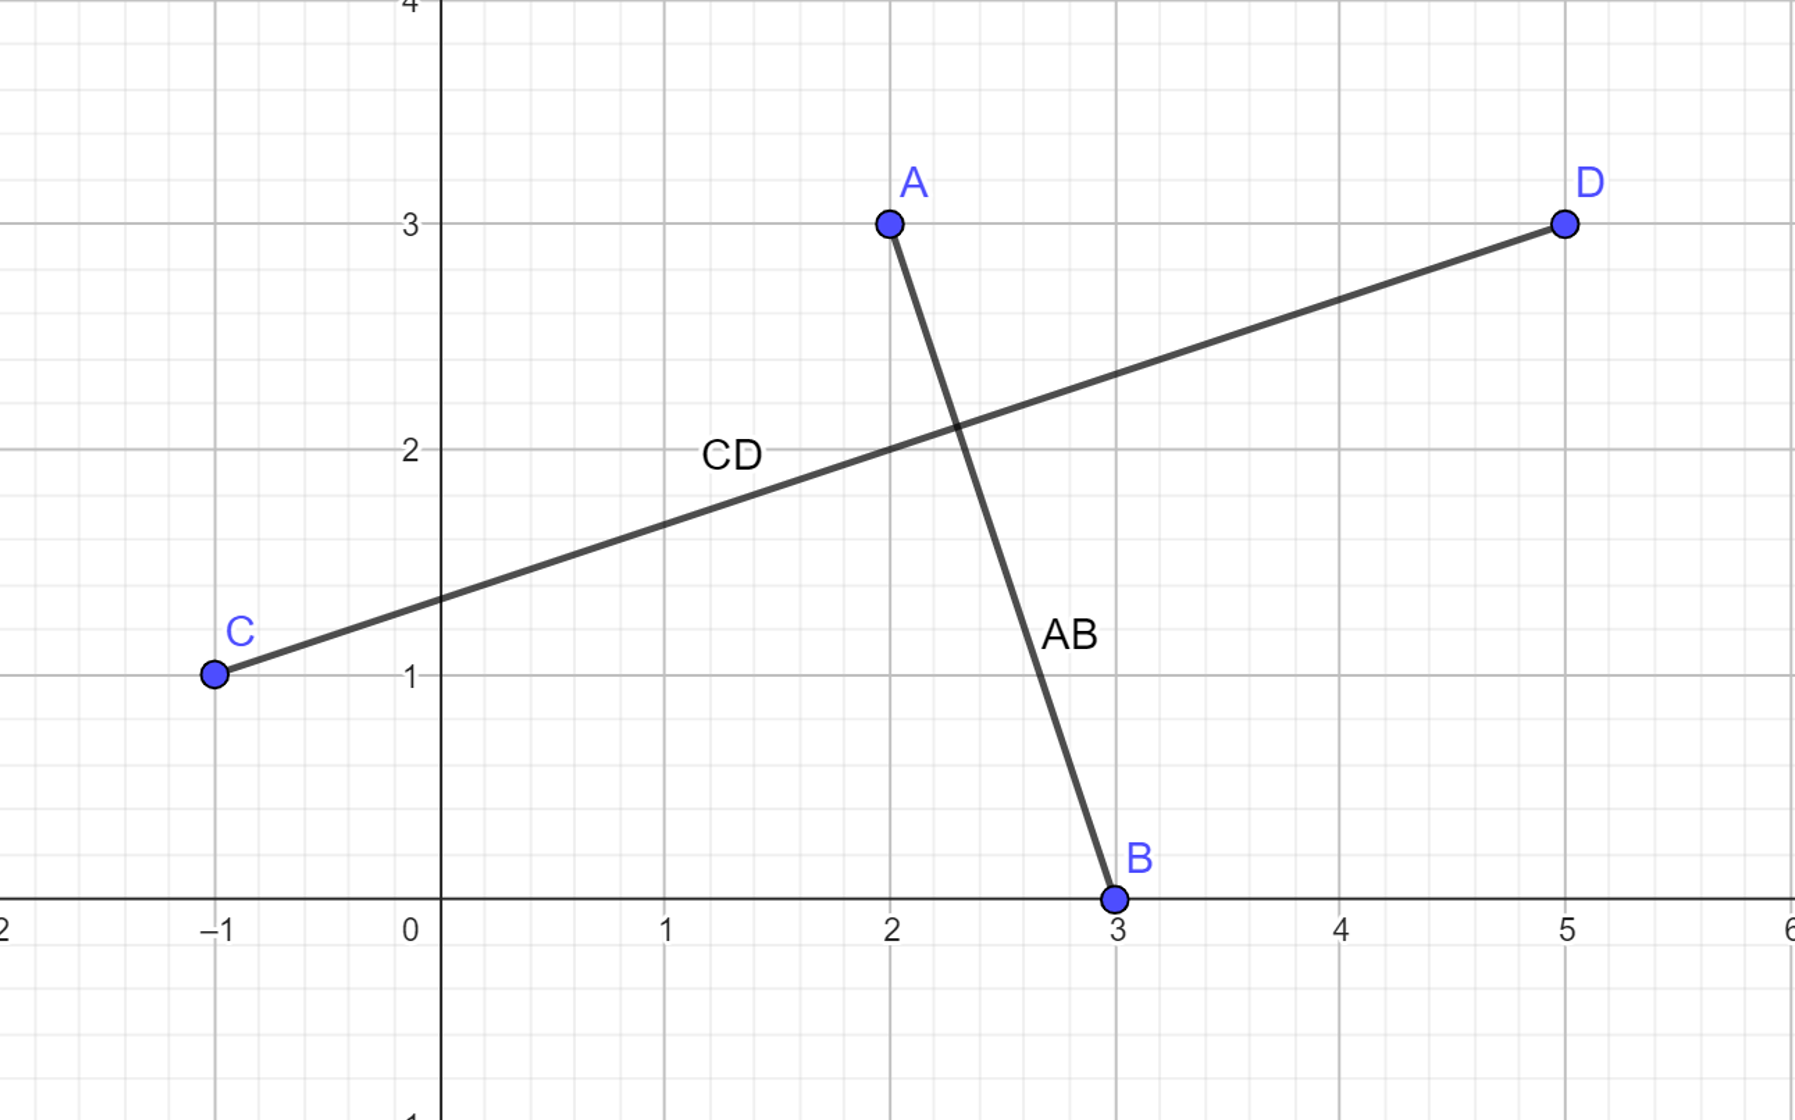

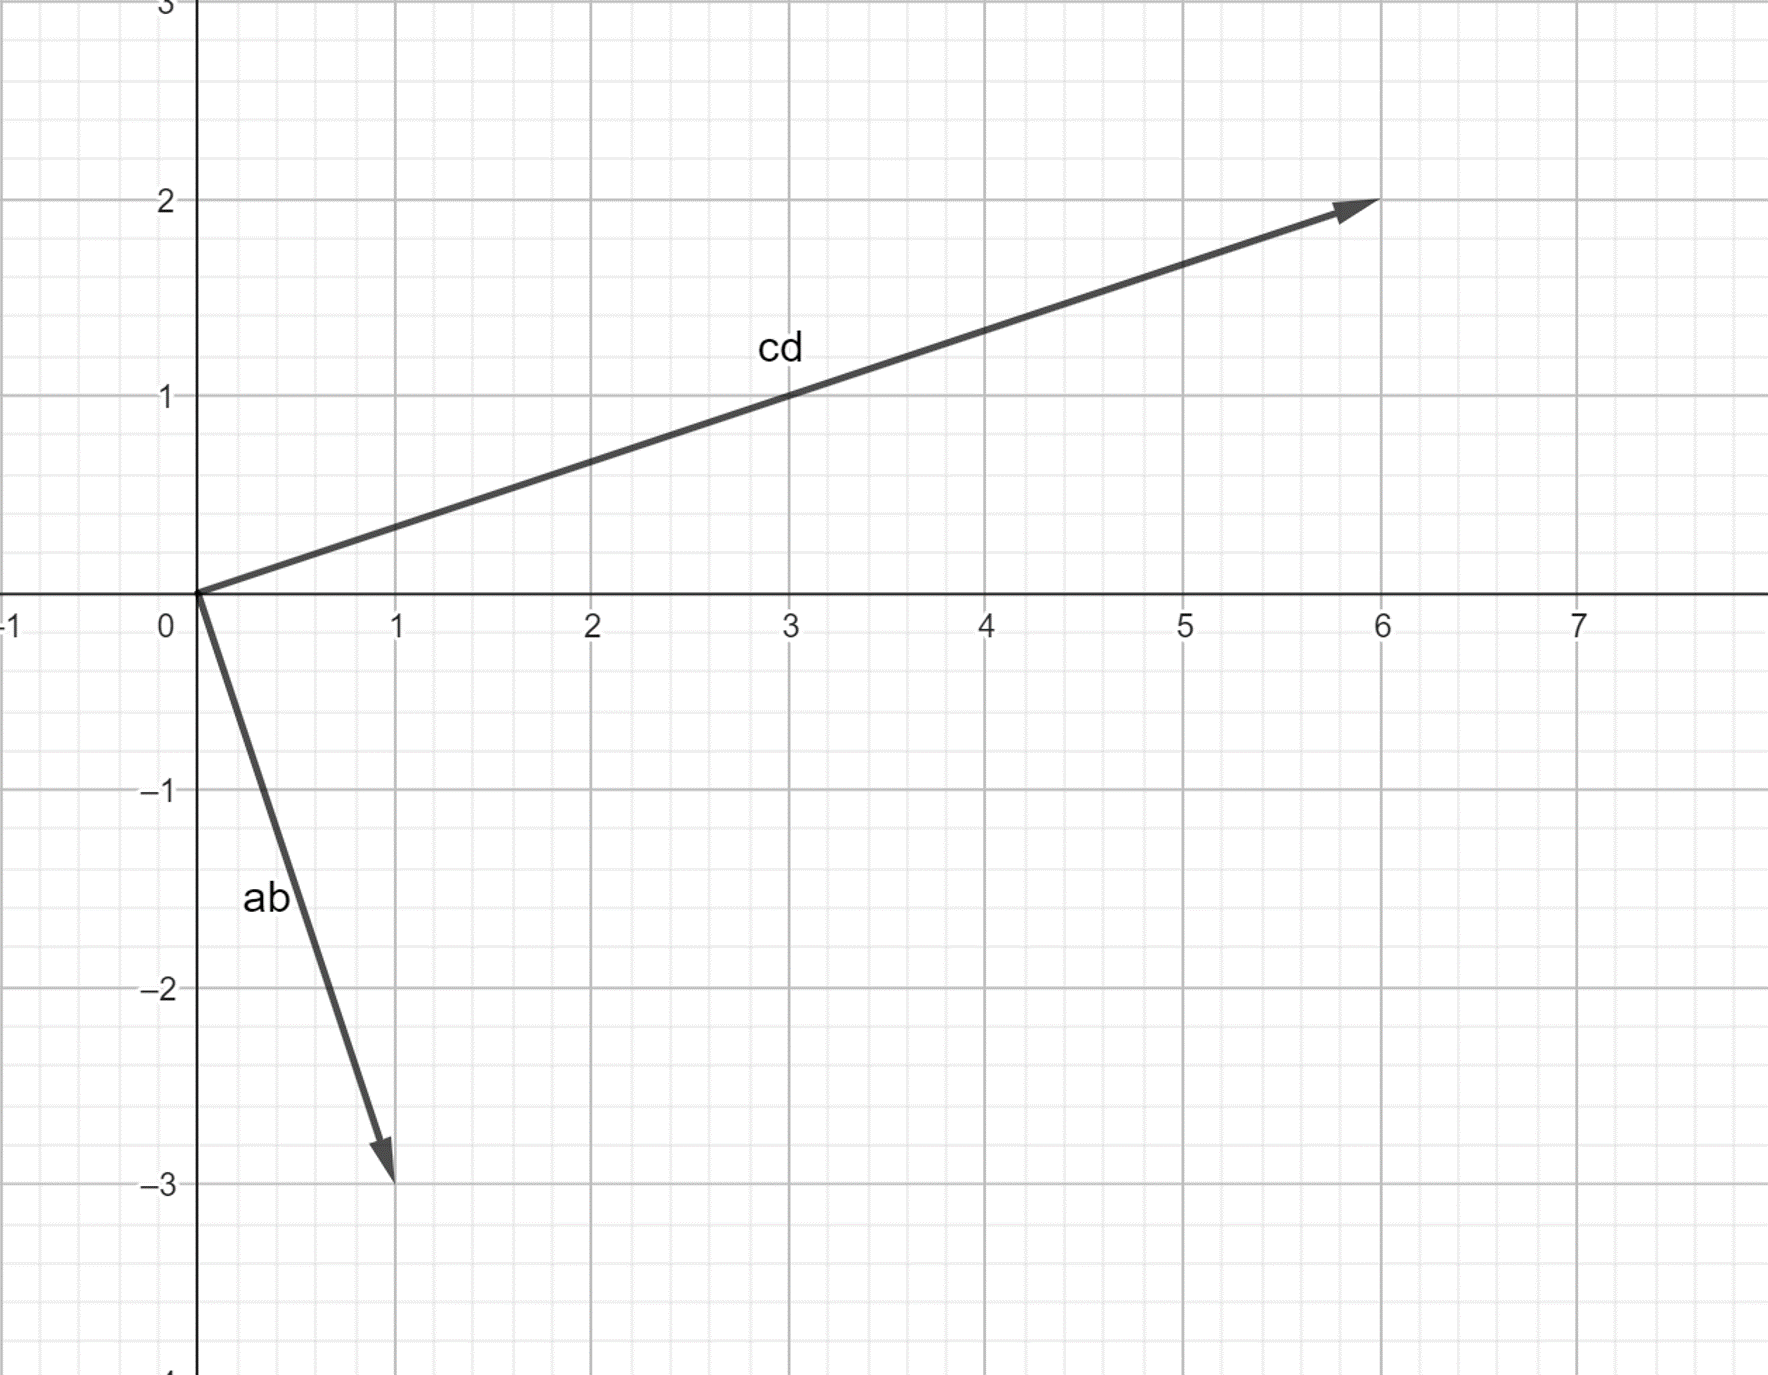

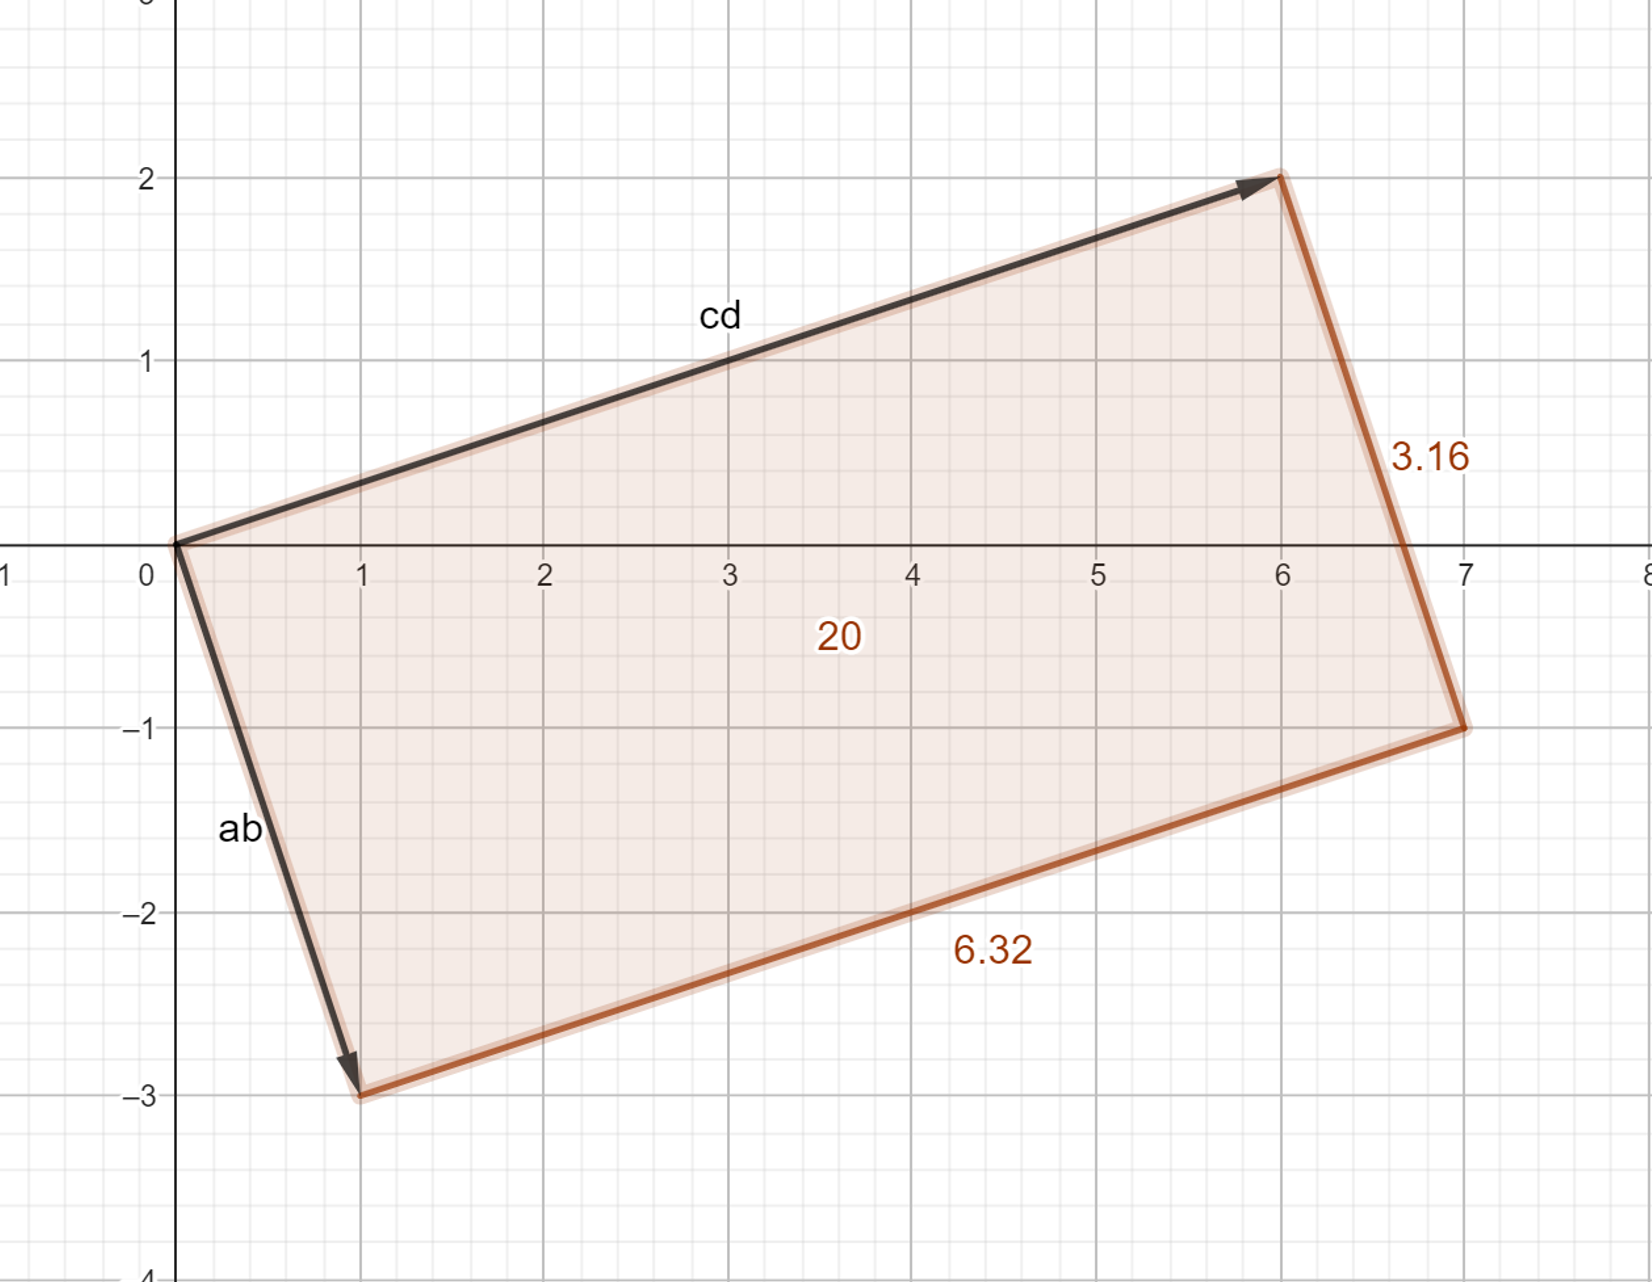

## Part 2

We now design an algorithm that determines if two line segments intersect. The pseudocode for this algorithm is:

1. Let the first line segment be between points $A$ and $B$, and let the second line segment be between points $C$ and $D$.
2. If the interior angle ABC is equal to $0$ or $\pi$, go to step 3. Otherwise go to step 4.
3. If $\min\{A_x,B_x\}$ $\leq$ $\max\{C_x,D_x\}$ and $\min\{C_x,D_x\}$ $\leq$ $\max\{A_x,B_x\}$, then return that the line segments intersect. Otherwise return that the line segments do not intersect.
3. Consider the quadrilateral ABCD. Calculate the interior angles $\alpha = \angle ABC$, $\beta = \angle BCD$, $\gamma = \angle CDA$, and $\delta = \angle DAB$.
4. If $\alpha + \beta + \gamma + \delta = 2\pi$, then return that the line segments do not intersect. Otherwise continue.
5. Consider the quadrilateral ABDC. Calculate the interior angles $\alpha' = \angle ABD$, $\beta' = \angle BDC$, $\gamma' = \angle DCA$, and $\delta' = \angle CAB$.
6. If $\alpha' + \beta' + \gamma' + \delta' = 2\pi$, then return that the line segments do not intersect. Otherwise return that the line segements intersect.

This pseudocode works on the basis that if AB and CD (which are not co-linear) intersect, then both ABCD and ABDC will be a crossed quadrilateral (two triangles). In addition, if AB and CD do not intersect, then then only one of ABCD and ABDC is a crossed quadrilateral - the other will be a standard quadrilateral.

In a standard quadrilateral, the four interior angles will sum to $2\pi$ radians. In a crossed quadrilateral, the six interior angles will sum to $2\pi$ radians - therefore the four non-central interior angles will sum to less than $2\pi$ radians. This means we can use the sum of the four non-central interior angles to determine if the which type of quadrilateral we have formed, and thus if the line segments intersect.

## Part 3

###### Please restart the kernal before continuing into this section!

First we include the header files that we need:

In [1]:
// Including necessary headers 
#include <iostream>
#include <list>
#include <cmath>

We now create a class for 2-dimensional points, including a function to find the anti-clockwise angle between three points and a function to find the Euclidean distance between two points.

In [2]:
// creating a class for 2-dimensional points
struct point {
    
    // basic definition of a point
    double x;
    double y;
    point(double _x = 0.0, double _y = 0.0) {
        x = _x;
        y = _y;   
    }
    
    // finding the anti-clockwise angle between three points
    double acw_angle(point b, point c) {
        
        // creating vectors between the points
        point AB (b.x-x,b.y-y);
        point BC (c.x-b.x,c.y-b.y);
        
        // calculating the ACW angles between the x-axis and the vectors
        double AB_xangle {atan2(AB.y,AB.x)};
        double BC_xangle {atan2(BC.y,BC.x)};
        
        // calculating the angle between the vectors
        double angle {BC_xangle - AB_xangle};
        
        // making sure the angle is between -pi and pi
        double negative_pi {-1 * M_PI};
        while (angle <= negative_pi) {
            angle = angle + (2*M_PI);
        }
        while (angle > M_PI) {
            angle = angle - (2*M_PI);
        }
        
        // outputting the final angle
        return angle;
    
    }
    
    // finding the Euclidean distance between two points
    double dist(point p) {
        double x_dist {x-p.x};
        double y_dist {y-p.y};
        double xy_dist_2 {pow(x_dist,2)+pow(y_dist,2)};
        double xy_dist {pow(xy_dist_2,0.5)};
        return xy_dist;
    }
    
    // operator for sorting points by their x-values (if x-values are equal, then points are sorted by y-values)
    bool operator< (point p) {
        if (x < p.x) {
            return true;
        }
        else if ((x == p.x) && (y < p.y)) {
            return true;
        }
        else {
            return false;
        }
    }
    
    // operator for checking if points are equal
    bool operator== (point p) {
        if ((x == p.x) && (y == p.y)) {
            return true;
        }
        else {
            return false;
        }
    }
    
    // operator for checking if points are not equal
    bool operator!= (point p) {
        if ((x != p.x) || (y != p.y)) {
            return true;
        }
        else {
            return false;
        }
    }
    
}

Now we make a function implementing the Jarvis-March algorithm, based on our implementation from the previous assessment. This function takes a list of points as its input (see the point class above) and outputs a list of the points on the hull.

In [3]:
// creating a function to find the convex hull of a list of points using the Jarvis-March algorithm
std::list<point> jarvis_march(std::list<point> data) {
    
    // sort the hull based on increasing x values
    data.sort();
    
    // remove duplicates
    data.unique();
    
    // the size of the data (with duplicates removed)
    int n {0};
    for (point p: data){
        n++;
    }
    
    // creating the convex hull list (empty)
    std::list<point> hull;
    
    // case where we have only one or two points
    if (n <= 2) {
        hull = data;
        return hull;
    }
    
    // case where all points lie on a straight line
    int straight_line {1};
    std::list<point> data_minus1;
    std::list<point> data_minus2;
    data_minus1 = data;
    data_minus2 = data;
    data_minus1.pop_front();
    data_minus2.pop_front();
    data_minus2.pop_front();
    for (point r: data_minus2) {
        if ((r.acw_angle(data.front(),data_minus1.front()) != 0) && (r.acw_angle(data.front(),data_minus1.front()) != M_PI)) {
            straight_line = 0;
        }
    }
    if (straight_line == 1) {
        hull = data;
        return hull;
    }
    
    // picking the initial point based on the smallest x value
    point p0;
    p0 = data.front();
    
    // at first the hull just contains the starting point
    hull.push_back(p0);
    
    // the current point is the intial point at first
    point p_curr {p0};
    
    // defining type of variables needed inside the following loop
    std::list<point> p_next;
    int pos {0};
    int p_next_size {0};
    point p_next_1 (0,0);
    double p_dist_star {INFINITY};
    double p_dist {0};
    
    // running the algorithm until we find the solution
    while (true) {
        
        // an empty list (it will contain the possible next values of p)
        p_next.clear();
        
        // we check every point other than the current
        for (point q: data){
            if (q != p_curr){
            
                // intial value of how many angles are positive
                pos = 0;
                
                // for each point other than current p and q, we check if the angle is positive
                for (point r: data) {
                    if((r != p_curr) && (r != q)) {
                        double acw_ang {p_curr.acw_angle(q,r)};
                        if(acw_ang >= 0) {
                            pos++;
                        }
                    }
                }
                
                // if all angles are positive, we make q a possible next value of p
                if (pos == (n-2)) {
                    p_next.push_back(q);
                }
            
            }
        }
        
        // the number of next possible values of p
        p_next_size = 0;
        for (point p: p_next) {
            p_next_size++;
        }
        
        // if there is one possible next value of p, then it becomes the next p
        if (p_next_size == 1) {
            p_next_1 = p_next.front();
        }
        
        // if there are multiple possible next values of p, we choose the closest possible value of p
        if (p_next_size >= 2) {
            p_dist_star = INFINITY;
            for (point p: p_next) {
                p_dist = p.dist(p_curr);
                if (p_dist < p_dist_star) {
                    p_dist_star = p_dist;
                    p_next_1 = p;
                }
            }
        }
        
        // adding the new value to the hull
        hull.push_back(p_next_1);
        
        // making the new value the current value for the next iteration
        p_curr = p_next_1;
        
        // checking if the current value is the inital value - if so, we output the convex hull
        if (p_curr == p0) {
            return hull;
        }
        
    }
    
}

To test that this code works we run it on the five datasets from the previous assessment and check that we recieve the same results.

The results from the previous assessment are

line: (1.0, 1.0), (2.0, 2.0), (3.0, 3.0).

pgram: (1.0, 1.0), (2.0, 2.0), (2.5, 2.5), (3.0, 2.0), (2.0, 1.0), (1.0, 1.0).

pines: (0.1, 7.2), (0.1, 9.9), (5.3, 9.8), (7.5, 9.3), (8.7, 8.7), (9.2, 8.1), (9.5, 6.2), (9.5, 4.6), (9.5, 2.3), (9.4, 1.0), (9.3, 0.8), (6.9, 0.4), (2.0, 0.2), (1.4, 1.6), (0.2, 6.2), (0.1, 7.2).

random: (-0.71657388106957, 1.20219702232312), (-0.545292317957066, 1.4050365090573), (-0.380951747864001, 1.45310545712829), (0.358984412999769, 1.56677311480003), (0.505823570824408, 1.12001307650065), (0.353922330922547, 0.654945271536898), (0.156196864138666, 0.537196258340319), (-0.432249029757549, 0.600185398765638), (-0.605200231305254, 0.957134110706781), (-0.71657388106957, 1.20219702232312).

sqaure: (1.0, 1.0), (1.0, 2.0), (1.5, 2.5), (2.0, 2.0), (2.0, 1.0), (1.0, 1.0).

We first create lists of points containing the datasets we want (note that I have removed empty lines from the 'pgram' file before loading it in). The following cells of code are based on the code in section 11 of the notebook provided (the first cell taken entirely, the other cells changed to give lists of points rather than vectors).

In [4]:
#include <fstream>
#include <sstream>
#include <string>

template <typename T>
T lexical_cast(const std::string& str)
{
    T var;
    std::istringstream iss;
    iss.str(str);
    iss >> var;
    // deal with any error bits that may have been set on the stream
    return var;
}

template<typename data_type,
template <typename... table_type_args> typename table_type,
template <typename... row_type_args> typename row_type>
table_type<row_type<data_type> > csvtable(const std::string& filename)
{
  table_type<row_type<data_type> > table;
  std::ifstream infile(filename);
  while(infile)
    {
      std::string s;
      if(!getline(infile,s)) break;
      std::istringstream ss(s);
      row_type<data_type> row;
      while(ss)
      {
         std::string s;
         if(!getline(ss,s,',')) break;
         row.push_back(lexical_cast<data_type>(s)); 
      }
      table.push_back(row);
    }
  return table;
}

#include <list>
#include <vector>

#define readcsv csvtable<double,std::list,std::vector>

In [7]:
std::string filename1 {"line.csv"};
std::list<std::vector<double> > xy_pairs1 {readcsv(filename1)};

std::list<point> line_data;
point a;

for(std::vector<double>& xy_pair : xy_pairs1){
    a.x = xy_pair[0];
    a.y = xy_pair[1];
    line_data.push_back(a);
}

In [5]:
std::string filename2 {"pgram.csv"};
std::list<std::vector<double> > xy_pairs2 {readcsv(filename2)};

std::list<point> pgram_data;
point b;

for(std::vector<double>& xy_pair : xy_pairs2){
    b.x = xy_pair[0];
    b.y = xy_pair[1];
    pgram_data.push_back(b);
}

In [8]:
std::string filename3 {"pines.csv"};
std::list<std::vector<double> > xy_pairs3 {readcsv(filename3)};

std::list<point> pines_data;
point c;

for(std::vector<double>& xy_pair : xy_pairs3){
    c.x = xy_pair[1];
    c.y = xy_pair[2];
    pines_data.push_back(c);
}

In [9]:
std::string filename4 {"random.csv"};
std::list<std::vector<double> > xy_pairs4 {readcsv(filename4)};

std::list<point> rand_data;
point d;

for(std::vector<double>& xy_pair : xy_pairs4){
    d.x = xy_pair[0];
    d.y = xy_pair[1];
    rand_data.push_back(d);
}

In [10]:
std::string filename5 {"square.csv"};
std::list<std::vector<double> > xy_pairs5 {readcsv(filename5)};

std::list<point> square_data;
point e;

for(std::vector<double>& xy_pair : xy_pairs5){
    e.x = xy_pair[0];
    e.y = xy_pair[1];
    square_data.push_back(e);
}

This means we can now run our Jarvis-March algorithm, and then print the results:

In [11]:
std::list<point> line_hull;
line_hull = jarvis_march(line_data);
std::cout << "line:" << std::endl;
for (point p: line_hull) {
    std::cout << "(" << p.x << "," << p.y << ")" << std::endl;
}

line:
(1,1)
(2,2)
(3,3)


In [12]:
std::list<point> pgram_hull;
pgram_hull = jarvis_march(pgram_data);
std::cout << "pgram:" << std::endl;
for (point p: pgram_hull) {
    std::cout << "(" << p.x << "," << p.y << ")" << std::endl;
}

pgram:
(1,1)
(2,1)
(3,2)
(2.5,2.5)
(2,2)
(1,1)


In [13]:
std::list<point> pines_hull;
pines_hull = jarvis_march(pines_data);
std::cout << "pines:" << std::endl;
for (point p: pines_hull) {
    std::cout << "(" << p.x << "," << p.y << ")" << std::endl;
}

pines:
(0.1,7.2)
(0.2,6.2)
(1.4,1.6)
(2,0.2)
(6.9,0.4)
(9.3,0.8)
(9.4,1)
(9.5,2.3)
(9.5,4.6)
(9.5,6.2)
(9.2,8.1)
(8.7,8.7)
(7.5,9.3)
(5.3,9.8)
(0.1,9.9)
(0.1,7.2)


In [14]:
std::list<point> random_hull;
random_hull = jarvis_march(rand_data);
std::cout << "random:" << std::endl;
for (point p: random_hull) {
    std::cout << "(" << p.x << "," << p.y << ")" << std::endl;
}

random:
(-0.716574,1.2022)
(-0.6052,0.957134)
(-0.432249,0.600185)
(0.156197,0.537196)
(0.353922,0.654945)
(0.505824,1.12001)
(0.358984,1.56677)
(-0.380952,1.45311)
(-0.545292,1.40504)
(-0.716574,1.2022)


In [15]:
std::list<point> square_hull;
square_hull = jarvis_march(square_data);
std::cout << "square:" << std::endl;
for (point p: square_hull) {
    std::cout << "(" << p.x << "," << p.y << ")" << std::endl;
}

square:
(1,1)
(2,1)
(2,2)
(1.5,2.5)
(1,2)
(1,1)


As we can see we have the same results (although in the reverse order to the results from the previous assessment).

In regard to the 5 R's, this code performs the mostly the same as in my submission for the Python assessment (since it is almost exactly the same, just in C++ rather than Python). However, C++ has a more complicated syntax than Python, making the code less Replicable.

## Part 4

We now design an algorithm that, given a set of points, finds the two points with the greastest distance between them. The psuedocode for this algorithm is:

1. Let $X$ be the dataset.
2. Let $d_{*}=0$, and let $p_{*}=q_{*}=(0,0)$.
3. For each pair $p,q$ in $X$:
<br> a. Calculate the distance between $p$ and $q$, which we call $d$.
<br> b. If $d > d_{*}$, let $p_{*} = p$, $q_{*} = q$, and $d_{*}=d$.
4. Return $p_{*}$ and $q_{*}$ as the points with the greastest distance between them.

If the data has size $n$, then the computational complexity is always $O(n^2)$, since there are $n$ choices for $p$ and $n$ choices for $q$ during step 3 of the algorithm pseudocode.

## Part 5

###### Please restart the kernal before continuing into this section!

First we inlcude the header files that we need:

In [1]:
// Including necessary headers 
#include <iostream>
#include <list>
#include <cmath>

We now create a class for 2-dimensional points, including a function to find the Euclidean distance between two points.

In [2]:
// creating a class for 2-dimensional points
struct point {
    
    // basic definition of a point
    double x;
    double y;
    point(double _x = 0.0, double _y = 0.0) {
        x = _x;
        y = _y;   
    }
    
    // finding the Euclidean distance between two points
    double dist(point p) {
        double x_dist {x-p.x};
        double y_dist {y-p.y};
        double xy_dist_2 {pow(x_dist,2)+pow(y_dist,2)};
        double xy_dist {pow(xy_dist_2,0.5)};
        return xy_dist;
    }
    
};

Now we make a function implementing the psuedocode from part 4. This function takes a list of points as its input (see the point class above) and outputs a list of the two points furthest away from each other.

In [3]:
// creating a function to, given a list of points, find the two points with the greatest distance between them
std::list<point> max_distance(std::list<point> data) {
    
    // checking we have at least two points
    int n {0};
    for (point p: data){
        n++;
    }
    if (n <= 1) {
        return data;
    }
    
    // defining intial values
    double d_star {0};
    point p_star (0,0);
    point q_star (0,0);
    
    // comparing the distance between every pair of points to the current largest difference
    for(point p: data) {
        for (point q: data) {
            double d {p.dist(q)};
            if (d > d_star) {
                d_star = d;
                p_star = p;
                q_star = q;
            }
        }
    }
    
    // returning the two points with the greastest distance between them
    std::list<point> solution {p_star,q_star};
    return solution;
}

We now test this algorithm (note that in the first case we cannot find the longest distance between any two points, since we only have one point, so we just return that point). We see that all results are as expected.

In [4]:
point a1 (1,1);
std::list<point> data1 {a1};
std::list<point> furthest1;
furthest1 = max_distance(data1);
for (point p: furthest1){
    std::cout << "(" << p.x << "," << p.y << ")" << std::endl;
}

(1,1)


In [5]:
point a2 (1,1);
point b2 (2,2);
point c2 (3,3);
point d2 (4,4);
std::list<point> data2 {a2,b2,c2,d2};
std::list<point> furthest2;
furthest2 = max_distance(data2);
for (point p: furthest2){
    std::cout << "(" << p.x << "," << p.y << ")" << std::endl;
}

(1,1)
(4,4)


In [6]:
point a3 (1,1);
point b3 (2,0);
point c3 (2,2);
point d3 (4,0);
point e3 (4,2);
point f3 (6,1);
std::list<point> data3 {a3,b3,c3,d3,e3,f3};
std::list<point> furthest3;
furthest3 = max_distance(data3);
for (point p: furthest3){
    std::cout << "(" << p.x << "," << p.y << ")" << std::endl;
}

(1,1)
(6,1)


Now consider pseudocode for a different method of, given a set of points, finding the two points with the greastest distance between them:

1. Let $X$ be our dataset.
2. Run the Jarvis-March algorithm on $X$, resulting in a convex hull $H$.
3. Run the algorithm described in part 4 on $H$, resulting in the two points with the greatest distance between them.

This method is based on the idea that the two points with the greatest distance between them are clearly on the convex hull.

Let our dataset have $n$ points, and the resulting convex hull have $h$ points. It is known that the Jarvis-March algorithm in theory has time complexity $O(nh)$, and we know that running our exhaustive algorithm on the convex hull has time complexity $O(h^2)$.

We know that $h<n$, but the compuational complexity will change based on how close $h$ is to $n$. This means that the compuational complexity is between $O(n)$ and $O(n^2)$ - the smaller $h$ is, the closer the computational complexity will be to $O(n)$.